# Atividade: Histograma e Binarização de Imagens

Existem diversos módulos de processamento de imagens para Python, como Pillow, OpenCV-Python, SimpleITK. Para esta atividade, recomendo o _scikit-image_. Vou mostrar um exemplo de como abrir uma imagem e gerar o histograma.

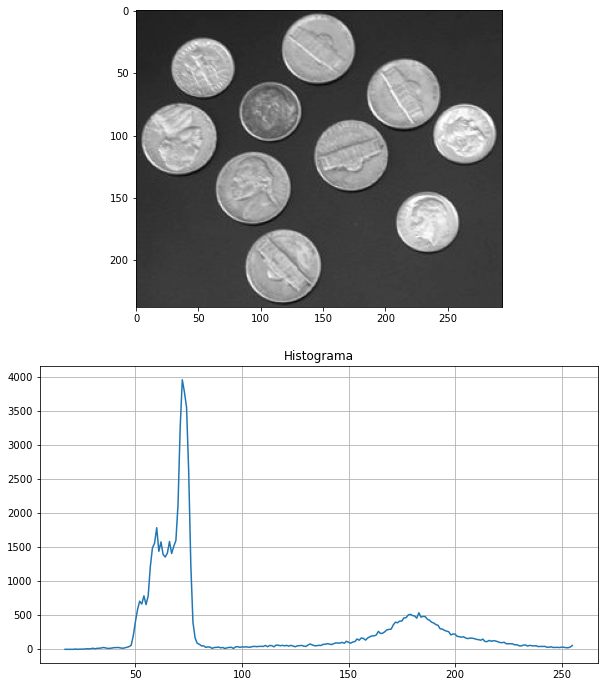

In [1]:
from skimage import io, exposure, data, img_as_float
from skimage.filters import threshold_local
import imshowpair
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
coins = io.imread('coins.jpg')
hist_y, hist_x = exposure.histogram(coins)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(coins, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

Nos itens seguintes, quando solicitado a mostrar a imagem resultante, use `imshowpair` [1] para mostrá-la lado a lado com a imagem original.

## Histograma

1. Compute o histograma da imagem _fingerprint_ [2] e apresente.

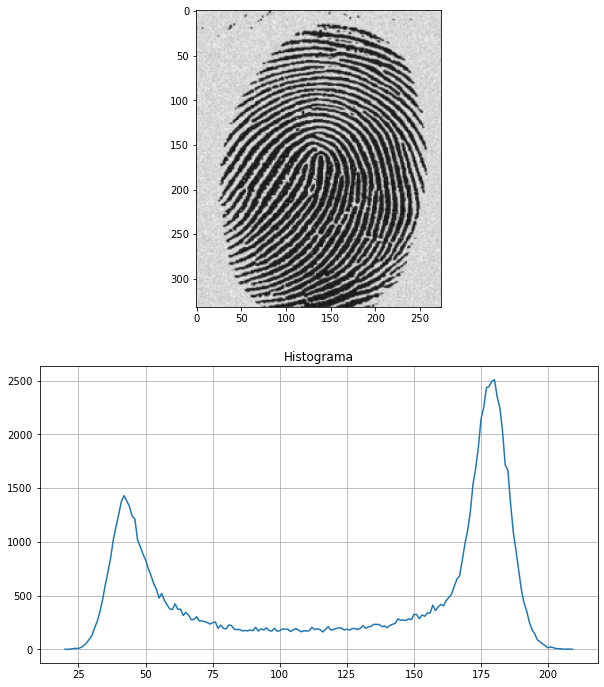

In [2]:
fingerprint = io.imread('fingerprint.jpg')
hist_y, hist_x = exposure.histogram(fingerprint)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(fingerprint, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

2. Na imagem _fingerprint_ [2], é possível distinguir o fundo e a impressão digital observando o histograma?

Sim, há uma diferença entre os valores de intensidade do fundo e da imagem no histograma.

## Binarização

3. Qual limite poderia ser usado para binarizar a imagem *fingerprint*? Observe e apresente o histograma, teste e mostre a imagem binarizada resultante lado a lado com a imagem original usando `imshowpair`.

O Histograma apresentado na questão anterior apresenta dois picos distantes para os valores de imagem e fundo. Observando-o foi escolhido um valor de 80 para ser o limite.

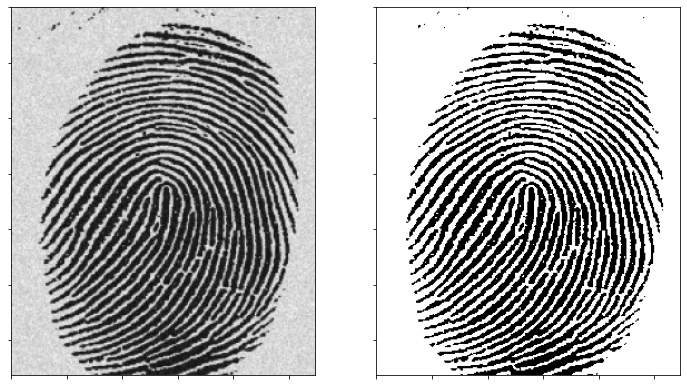

In [3]:
lim = 80
finger_bin = fingerprint > lim
plt.figure(num=2,figsize=(12,14))
imshowpair.imshowpair(fingerprint,finger_bin,cmap='gray')
plt.show()


4. De forma semelhante, que limite poderia ser usado para binarizar a imagem _son1_ ou _darkerforeground_ [3]? Mostre o resultado.

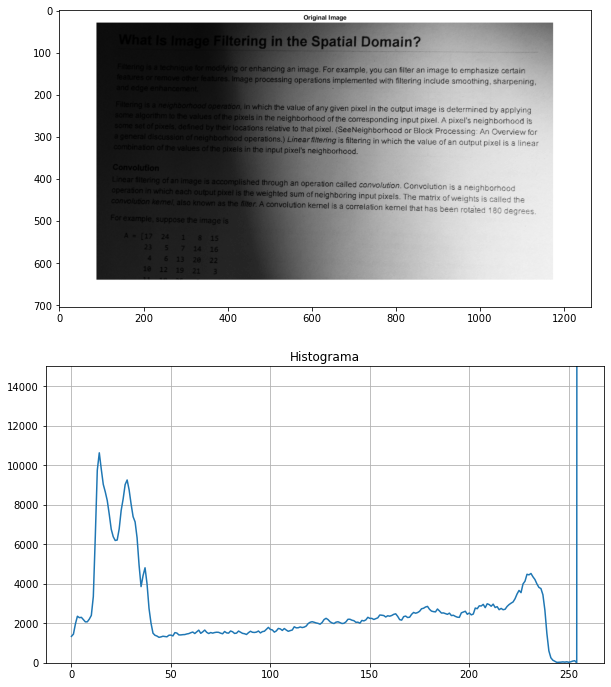

In [4]:
darker = io.imread('darkerforeground.png')
hist_y, hist_x = exposure.histogram(darker)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(darker, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.set_ylim(0,15000)
ax2.grid()
plt.show()

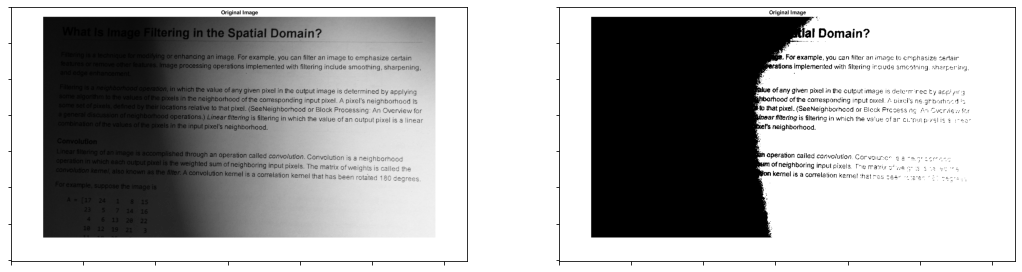

In [5]:
lim = 100
darker_bin = darker > lim
plt.figure(num=2,figsize=(18,16))
imshowpair.imshowpair(darker,darker_bin,cmap='gray')
plt.show()

5. Verifique que a binarização global da imagem _son1_ ou _darkerforeground_ [3] não provê um bom resultado. Use um limiar adaptativo (`threshold_local` no módulo _Scikit Image_ a partir da versão 0.13 [4] e mostre o resultado.

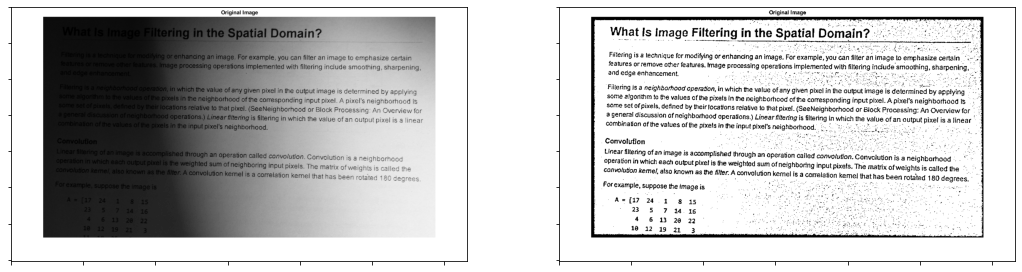

In [6]:
t_lim = threshold_local(darker,25,offset=3)

darker_local = darker > t_lim
plt.figure(num=2,figsize=(18,16))
imshowpair.imshowpair(darker,darker_local,cmap='gray')
plt.show()

6. Observe o histograma da imagem _pout_ [5]. O que você pode concluir?

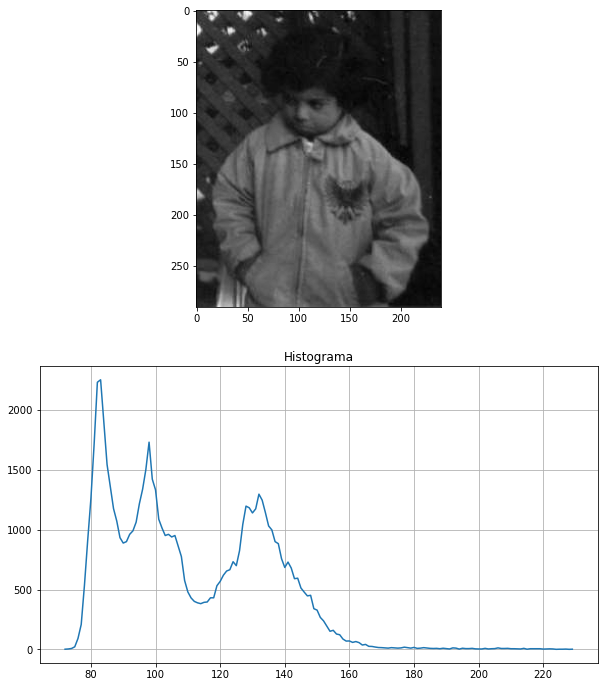

In [7]:
pout = io.imread('pout.jpg')
hist_y, hist_x = exposure.histogram(pout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(pout, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

Pode-se concluir que os tons da imagem estão todos concentrados em uma mesma faixa, tendendo ao cinza

## Equalização de histograma

7. Compare as técnicas de equalização de histograma implementadas nas funções `rescale_intensity`, `equalize_hist` e `equalize_adapthist` do _Scikit Image_ [6] , usando a imagem _pout_ [5] como teste. Pesquise as referências apresentadas na documentação de cada uma das funções e explique as diferenças entre elas.

In [8]:
matplotlib.rcParams['font.size'] = 8
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

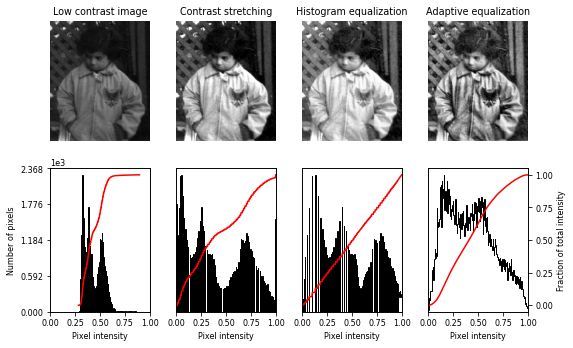

In [9]:
# Contrast stretching
p2, p98 = np.percentile(pout, (2, 98))
img_rescale = exposure.rescale_intensity(pout, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(pout)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(pout, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(pout, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


<b>Contrast Stretching:</b> Distruibui os valores dos pixels dentro do intervalo determinado, com o fim de melhorar o contraste.

<b>Histogram Equalization:</b> Normaliza a distribuição dos valores mais intensos, dando mais destaque às de menor intensidade.

<b>Adaptive equalization:</b> Separa a imagem em vários pedaços e utiliza um limite para cada um deles, melhorando o contraste com uma variação nos tons da imagem.

8. De forma semelhante, aplique uma das técnicas de equalização de histograma para realçar a imagem _dentalradiograph_ [7].

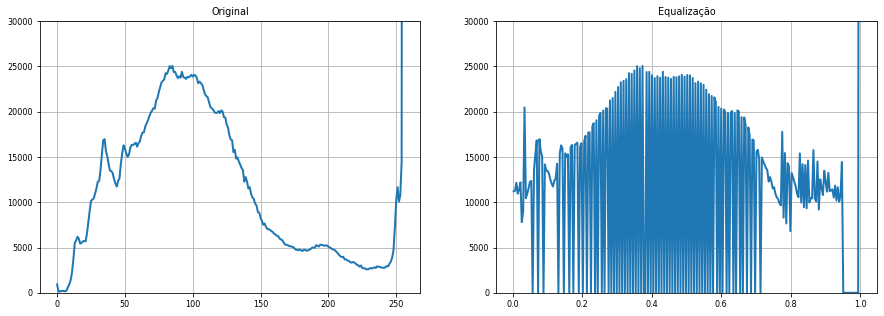

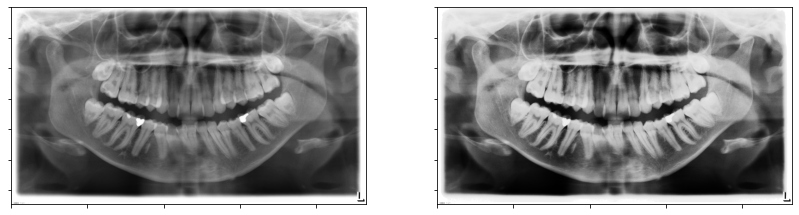

In [10]:
dental = io.imread('DentalRadiograph.png')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
hist,dental_hist = exposure.histogram(dental)
ax1.plot(dental_hist,hist, lw=2)
ax1.set_ylim(0,30000)
ax1.set_title('Original')
ax1.grid()

img_eq = exposure.equalize_hist(dental)
hist,dental_hist = exposure.histogram(img_eq)
ax2.plot(dental_hist,hist, lw=2)
ax2.set_title('Equalização')
ax2.set_ylim(0,30000)
ax2.grid()
plt.show()

plt.figure(figsize=(14,12))
imshowpair.imshowpair(dental, img_eq, cmap='gray')
plt.show()

## Referências
[1] https://pypi.org/project/imshowpair/

[2] http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg

[3] http://homepages.inf.ed.ac.uk/rbf/HIPR2/images/son1.gif ou https://www.mathworks.com/help/examples/images/win64/BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png

[4] https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

[5] http://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg

[6] https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

[7] https://imagej.nih.gov/ij/images/DentalRadiograph.png

[8] http://www.mathworks.com/help/releases/R2016b/examples/images/CompareResultsOfAveragingFilterAndMedianFilterExample_02.png


## Bibliografia
https://opensource.com/article/19/3/python-image-manipulation-tools

https://www.mathworks.com/examples/image/mw/images-ex28564424-create-image-histogram

https://www.mathworks.com/examples/image/mw/images-ex57959084-basic-image-enhancement-and-analysis-techniques

http://www.mathworks.com/help/images/ref/imbinarize.html

http://blogs.mathworks.com/steve/2016/06/14/image-binarization-otsus-method

https://www.mathworks.com/examples/image/mw/images-ex97343802-contrast-enhancement-techniques

https://www.mathworks.com/examples/image/mw/images-ex74217292-remove-noise-using-an-averaging-filter-and-a-median-filter

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/examples/image/mw/images-ex45754758-filter-images-using-predefined-filters

https://www.mathworks.com/examples/image/community/18507-missing-planes